In [11]:
#some toying with networkx
import pandas as pd
import networkx as nx
%matplotlib inline
# Reading in data
book1 = pd.read_csv('datasets/book1.csv')
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [12]:
G_book1 = nx.Graph()
# Iterating through the DataFrame to add edges. Also make sure it works
for i, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [13]:
# Reading in rest of data while creating a list of networks for all the books
books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [14]:
# Seeing how relationships differ from first to last book
deg_cen_book1 = nx.degree_centrality(books[0])
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting by degree centrality for top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x: x[1], reverse=True)
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x: x[1], reverse=True)


display(sorted_deg_cen_book1[:10])
sorted_deg_cen_book5[:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

[('Jon-Snow', 0.1962025316455696),
 ('Daenerys-Targaryen', 0.18354430379746836),
 ('Stannis-Baratheon', 0.14873417721518986),
 ('Tyrion-Lannister', 0.10443037974683544),
 ('Theon-Greyjoy', 0.10443037974683544),
 ('Cersei-Lannister', 0.08860759493670886),
 ('Barristan-Selmy', 0.07911392405063292),
 ('Hizdahr-zo-Loraq', 0.06962025316455696),
 ('Asha-Greyjoy', 0.056962025316455694),
 ('Melisandre', 0.05379746835443038)]

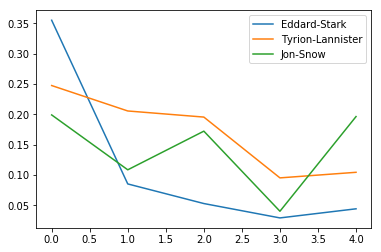

In [15]:
# Degree centrality df, and biggest men from TV show
evol = [nx.degree_centrality(book) for book in books]
degree_evol_df = pd.DataFrame.from_records(evol) 

interesting_chars = ['Eddard-Stark','Tyrion-Lannister','Jon-Snow']
degree_evol_df[interesting_chars].plot()

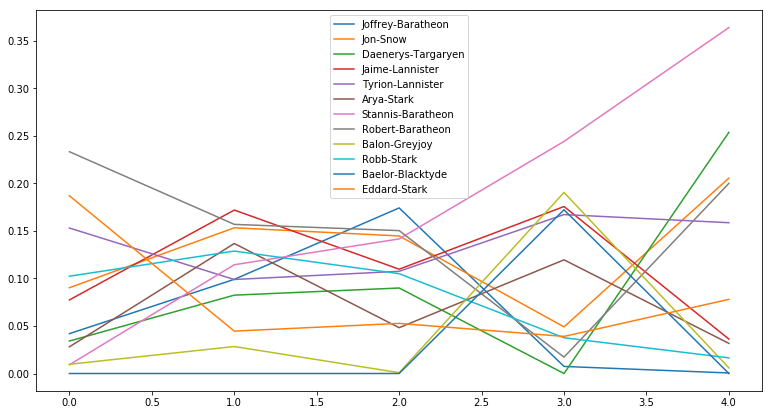

In [16]:
# Betweenness centrality df
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]
betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Top 4 in each book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
#uniquely lists the df that swaps cols/index
#seleccts ith col (book), selects top 4 rows, grabs index (names)
list_of_char = list(set_of_char)

betweenness_evol_df[list_of_char].plot(figsize=(13,7))

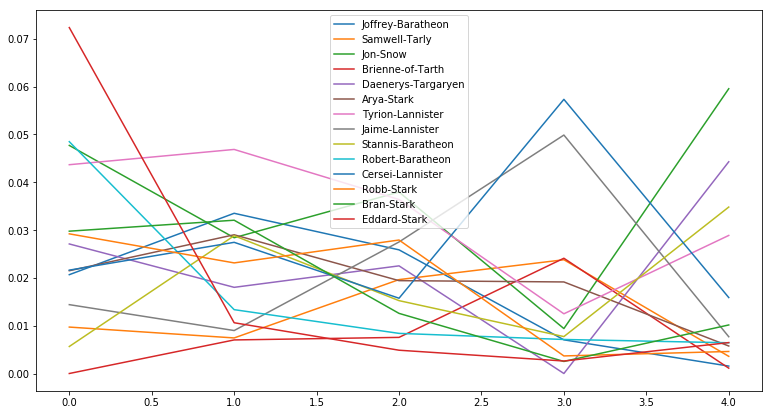

In [17]:
# Making pagerank df 
evol = [nx.pagerank(book) for book in books]
pagerank_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Finding their top 4
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

pagerank_evol_df[list_of_char].plot(figsize=(13,7))

In [19]:
# Pagerank, betweenness centrality, degree centrality for all characters
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Correlation
cor = pd.DataFrame.from_records(measures).fillna(0)
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


In [20]:
# Most importand characters in fifth book by degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

print(p_rank)
print(b_cent)
print(d_cent)

Jon-Snow
Stannis-Baratheon
Jon-Snow
